In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [58]:
def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [59]:
# Create a custom function for data transformation
# May as well import all of these features into the initial dataframe, you can cut it down..
# ..when you do the X,y train/test split
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


In [60]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


# reading file from 9/22 dataset
df4 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)

C:\Users\twolf\AppData\Local\Temp\ipykernel_28140\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_28140\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_28140\17026926.py:3: SettingWithCopyWarning: 
A valu

In [61]:
#Combine files
df = pd.concat([first_file,second_file, df1, df2, df3, df4]).reset_index()

# Dataframe for Quick Stop

In [62]:
df_q = df.copy()
df_q['QuickStop'] = 0

df_q.loc[(df_q['datetime'].between('2022-09-19 22:00:35' , '2022-09-19 22:01:44' , inclusive='both')),['QuickStop']] = 1
df_q.loc[(df_q['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['QuickStop']] = 1
df_q.loc[(df_q['datetime'].between('2022-09-22 21:36:50' , '2022-09-22 21:37:10' , inclusive='both')),['QuickStop']] = 1
df_q.loc[(df_q['datetime'].between('2022-09-22 21:39:16' , '2022-09-22 21:39:42' , inclusive='both')),['QuickStop']] = 1
df_q.loc[(df_q['datetime'].between('2022-09-22 21:40:06' , '2022-09-22 21:40:36' , inclusive='both')),['QuickStop']] = 1

In [63]:
df_q['QuickStop'].value_counts()

0    6984
1     236
Name: QuickStop, dtype: int64

# Edit DF for ML, Class Balance, Select Features

In [64]:
#Edit the model features to whatever you want to include in your model
all_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque', 'QuickStop']

df_q = df_q[all_features]

In [65]:
df1 = df_q[(df_q['QuickStop'] == 0)].sample(n=236, replace=False, random_state=123458)
df2 = pd.concat([df_q[(df_q['QuickStop'] == 1)], df1], ignore_index = True)
df2 = df2.sample(frac=1)

In [66]:
df2['QuickStop'].value_counts()

1    236
0    236
Name: QuickStop, dtype: int64

In [67]:
df2.head()

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,QuickStop
184,0.0,141.246486,13.718054,54.690324,-233.555270,-0.949459,-13.548027,3.802162,27.116973,8.487432,36.819784,23.638568,23.638568,1
270,1.0,0.287187,24.387719,17.216469,-0.267406,0.000125,-5.251844,-1.843094,35.935969,-1.158531,46.442000,40.013625,40.013625,0
401,1.0,0.070000,342.277000,0.000000,0.000000,0.000000,5.727431,53.093804,3.633000,-21.672000,0.000000,4.453804,4.453804,0
404,0.0,1805.811277,173.035766,77.330915,42.572915,0.327957,-19.637532,-2.301064,34.452723,17.382000,49.477043,43.765638,43.765638,0
172,0.0,18.818182,195.408576,1.793333,-164.144121,-0.529970,-5.879273,-0.029576,45.626697,-12.582667,54.965303,58.899727,58.899727,1


# SVM Surface Taxi

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.utils import resample

In [69]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['QuickStop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [70]:
#SVC
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm = SVC()


svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.79
Accuracy of SVM classifier on test set: 0.8526


In [71]:
y_pred=svm.predict(X_test)

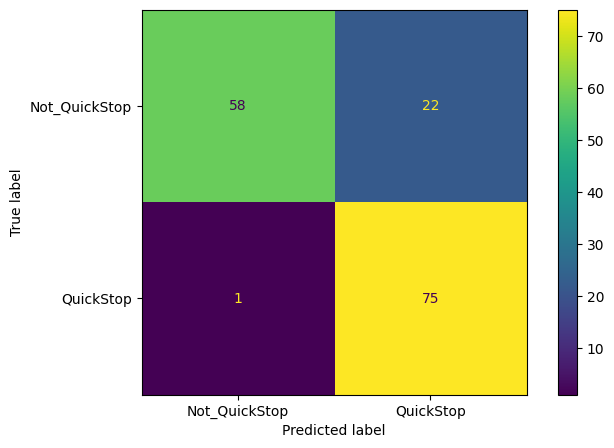

In [72]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_QuickStop', 'QuickStop'])
cmp.plot(ax=ax)
plt.show()

In [73]:
#Verify display labels are right
y_test.value_counts()

0    80
1    76
Name: QuickStop, dtype: int64

# Standard Scalar

In [74]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['QuickStop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [75]:
#SVM standard 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(C=10)
#y_pred=svm.predict(X_test)

svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.95
Accuracy of SVM classifier on test set: 0.9423


In [76]:
y_pred=svm.predict(X_test)

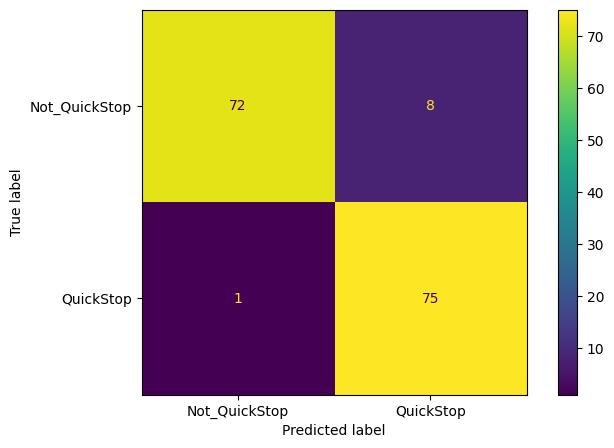

In [77]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_QuickStop', 'QuickStop'])
cmp.plot(ax=ax)
plt.show()

In [ ]:
#saving model

In [79]:
import pickle

In [80]:
pickle.dump(svm, open('quick_ss2.pkl', 'wb'))

In [81]:
pickle.dump(scaler, open('scaler_ss.pkl','wb'))

# SVM Robust Scalar

In [ ]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['QuickStop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [ ]:
#SVM standard 
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC()
#y_pred=svm.predict(X_test)

svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))

In [ ]:
y_pred=svm.predict(X_test)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_QuickStop', 'QuickStop'])
cmp.plot(ax=ax)
plt.show()

# Load in new data for validation

In [82]:
# Create a custom function for data transformation
# May as well import all of these features into the initial dataframe, you can cut it down..
# ..when you do the X,y train/test split
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


In [83]:
# reading files from 10/20 dataset
dfN = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
dfN = df_transformation(dfN)

C:\Users\twolf\AppData\Local\Temp\ipykernel_28140\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [32]:
dfN

,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,roll,...,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
0,2022-10-20 21:19:29,51.462292,-0.451407,0.020000,89.739556,89.516000,0.321667,0.329948,0.619333,0.785556,...,0.447778,1.0,0.044000,-0.418556,-8.537667,3.595667,-9.838111,0.000000,-5.374333,-5.374333
1,2022-10-20 21:19:30,51.462292,-0.451407,0.051351,89.347595,89.123865,0.040459,0.043540,0.671757,0.586081,...,1.962649,1.0,-0.126703,0.530730,0.700162,3.612054,-9.851946,0.000000,-4.986000,-4.986000
2,2022-10-20 21:19:31,51.462292,-0.451407,0.060000,89.505306,89.281556,0.002278,0.002567,0.675694,0.557528,...,1.075917,1.0,-0.034167,0.606722,-0.132028,3.548028,-9.858083,0.000000,-2.689556,-2.689556
3,2022-10-20 21:19:32,51.462292,-0.451407,0.060000,89.540108,89.316351,0.001054,0.002066,0.676405,0.554432,...,0.297919,1.0,-0.010919,0.579514,-0.028351,3.575892,-9.864270,0.000000,-1.498676,-1.498676
4,2022-10-20 21:19:33,51.462292,-0.451407,0.060000,89.555083,89.331528,0.000944,0.001596,0.676694,0.552472,...,0.093417,1.0,-0.002639,0.897722,-0.031250,3.579389,-10.675278,0.000000,-0.702167,-0.702167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,2022-10-20 22:01:53,51.472413,-0.467716,0.120000,255.100974,254.870000,0.000000,0.000000,0.877949,0.023000,...,-0.002256,1.0,-0.000359,30.270026,-6.240692,3.732000,1.643385,43.994000,35.081795,35.081795
2459,2022-10-20 22:01:54,51.472413,-0.467716,0.120000,254.911056,254.680306,0.046278,0.046263,0.885250,0.015194,...,0.019139,1.0,-0.065611,30.119806,-6.162111,3.732000,1.636833,13.442528,16.198861,16.198861
2460,2022-10-20 22:01:55,51.472413,-0.467716,0.120000,253.661000,253.430270,0.037622,0.038063,0.881405,0.024730,...,0.087027,1.0,-0.421027,30.729297,-6.434946,3.739324,1.657459,0.000000,-4.099730,-4.099730
2461,2022-10-20 22:01:56,51.472413,-0.467716,0.120000,253.704162,253.473459,0.005973,0.006037,0.801757,0.031649,...,-0.086081,1.0,-0.233838,30.979135,-6.213486,3.756514,1.886703,0.000000,-2.887649,-2.887649


In [84]:
dfN['Quick_Stop'] = 0

dfN.loc[(dfN['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['Quick_Stop']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['Quick_Stop']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['Quick_Stop']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['Quick_Stop']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['Quick_Stop']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['Quick_Stop']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['Quick_Stop']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['Quick_Stop']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['Quick_Stop']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['Quick_Stop']] = 1

In [85]:
dfN['Quick_Stop'].value_counts()

0    2221
1     242
Name: Quick_Stop, dtype: int64

In [86]:
df1 = dfN[(dfN['Quick_Stop'] == 0)].sample(n=242, replace=False, random_state=123458)
df2 = pd.concat([dfN[(dfN['Quick_Stop'] == 1)], df1], ignore_index = True)
df2 = df2.sample(frac=1)

In [87]:
df2['Quick_Stop'].value_counts()

1    242
0    242
Name: Quick_Stop, dtype: int64

In [89]:
#Tune 
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['Quick_Stop']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

# Load Pickle 

In [90]:
svm_loaded = pickle.load(open('quick_ss2.pkl', 'rb'))
scaler_loaded = pickle.load(open('scaler_ss.pkl','rb'))

In [91]:
#SVC

X_valid = scaler_loaded.transform(X)



In [92]:
validation_svm = svm_loaded.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y,validation_svm))

Accuracy of Model:: 0.7975206611570248
